# Project: Investigate a Dataset (No Show Appointments)
# Done by: Saad Alotaibi

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
Here, I will analyze and explore a dataset that contains 100,000 medical appointments in Brazil, where a number of characteristics about the patient are included in each row.
And after that, I will come up with some possible conclusions as to why so many patients do not show up to their appointment.
>

<b> Questions </b>
1. Is There a Relationship between Alcoholism and not showing to the appointment?
2. What Age Group has the Most Appointments?
3. Does waiting time between scheduled and appointment day have an effect on missing the appointment?
4. Does receiving an SMS has an affect on missing the appointment?

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import datetime

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
df = pd.read_csv("no_show_appointments.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
print(f"1. There is {df.shape[0]} samples")
print(f"2. There is {df.shape[1]} columns")

1. There is 110527 samples
2. There is 14 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In the cell above some basic information about the data,
* columns names
* column data types. And some need to be changed
* It looks like some column names are misspelled

In [5]:
print(f"There are {sum(df.duplicated())} duplicates in this dataset")

There are 0 duplicates in this dataset


In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

* As we can see there is no null values in all the columns

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- summary stats
- In the age min value we see (-1) which is impossible so we're gonna remove it

## Cleaning Data

Now I'm going to drop some columns that I don't need

In [8]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [9]:
# Checking to see if the columns are dropeed
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# Rename no-show to No_show with underscore and fixing some misspellings
df.rename(columns={'No-show':'No_show',
                   'Hipertension':'Hypertension',
                   'Handcap':'Handicap',
                   'ScheduledDay':'Scheduled_Day',
                   'AppointmentDay':'Appointment_Day'}, inplace=True)

In [11]:
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Used a Lambda Function to lowercase all the column names

In [12]:
# Lambda Function to lowercase all the column names

df = df.rename(columns=lambda x: x.lower())

In [13]:
# making sure the names has changed
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
# Here I sliced the Scheduled_Day column to take only the Date. Bescause I don't need the time.
df['scheduled_day'] = df['scheduled_day'].str[:10]

In [15]:
# Here I sliced the Appointment_Day column to take only the Date. Bescause I don't need the time.
df['appointment_day'] = df['appointment_day'].str[:10]

In [16]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


* In the cell below I'm going to convert the **Scheduled_Day** and **Appointment_Day** columns from <u>object</u> to <u>Datetime</u> data type

In [17]:
df['scheduled_day']   = pd.to_datetime(df['scheduled_day']).dt.normalize()
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.normalize()

In [18]:
# Making sure the dtypes are datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   gender           110527 non-null  object        
 1   scheduled_day    110527 non-null  datetime64[ns]
 2   appointment_day  110527 non-null  datetime64[ns]
 3   age              110527 non-null  int64         
 4   neighbourhood    110527 non-null  object        
 5   scholarship      110527 non-null  int64         
 6   hypertension     110527 non-null  int64         
 7   diabetes         110527 non-null  int64         
 8   alcoholism       110527 non-null  int64         
 9   handicap         110527 non-null  int64         
 10  sms_received     110527 non-null  int64         
 11  no_show          110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


In [19]:
#Now I'm going to drop the -1 value in the Age column becuase it doesn't make sense
df.drop(df[df.age < 0].index, inplace=True)

In [20]:
# In the Handicap column Any value other than ZERO will assigned to 1. It is easier for analysis
df.loc[df['handicap'] != 0, 'handicap'] = 1

In [21]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### No I'm going to change the No_show column encoding to 0 and 1. for easier analysis


In [22]:
# 1 means they did show up
# 0 means they did NOT show up
df.loc[df['no_show'] == "No", 'no_show'] = 1
df.loc[df['no_show'] == "Yes", 'no_show'] = 0

In [23]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


<a id='eda'></a>
## Exploratory Data Analysis

> In this section i will do some visualization to explore the data and answer some questions 

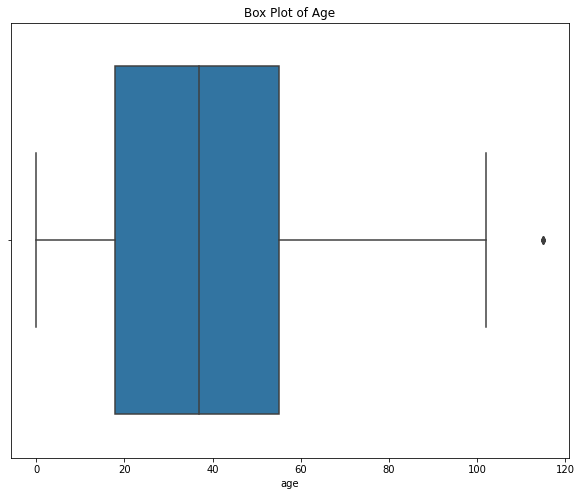

In [24]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x=df['age'])
ax.set_title("Box Plot of Age");

- as we can see from the boxplot the min age is 0 and the median age is 37
- there are some extreme age values in this dataset based on the plot above

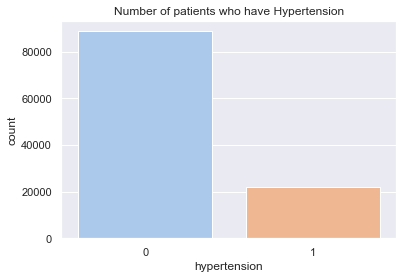

In [25]:
sns.set(style='darkgrid')
ax = sns.countplot(x=df['hypertension'], palette='pastel')
ax.set_title('Number of patients who have Hypertension');

* Major of patients don't have Hypertension issues.
* patients who have Hypertension are 21,801

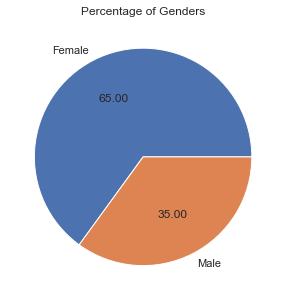

In [26]:
fig = plt.figure(figsize =(10, 5))
plt.pie(df['gender'].value_counts(normalize=True), labels=['Female', 'Male'], autopct='%.2f')
plt.title("Percentage of Genders")
plt.show()

- Females are the majority of this dataset with 71,839 patients 65%

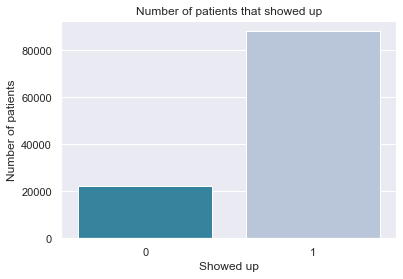

In [27]:
ax = sns.countplot(x=df['no_show'], palette="PuBuGn_r")

ax.set(xlabel='Showed up', ylabel='Number of patients')
ax.set_title("Number of patients that showed up");

1. 80% of patients did show up
2. 20% of patients did not show up

### 1. Is There a Relationship between Alcoholism and not showing to the appointment?

In [28]:
# First i'm gonna create two datasets with patients one with patients who did show up and one with no show up

did_show     = df[df['no_show']==1]
did_not_show =  df[df['no_show']==0]

In [29]:
# Patients that didn't received an SMS but did not show up
show_received_Alcohol = did_show['alcoholism'].value_counts()[1]

# Patients that received an SMS but did not show up
noshow_received_Alcohol = did_not_show['alcoholism'].value_counts()[1]

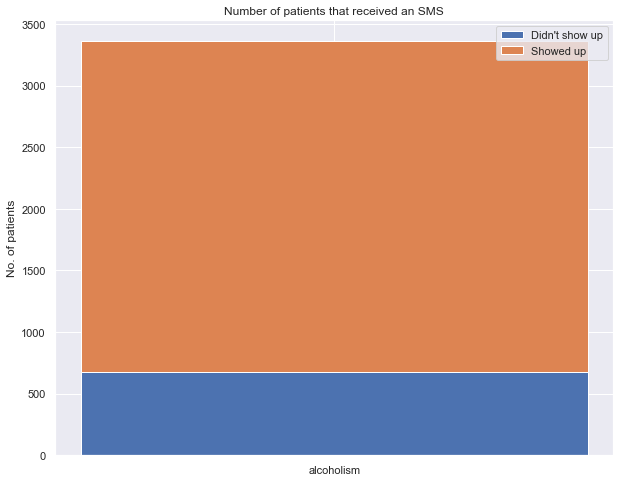

In [30]:
labels = ['alcoholism']
showed = show_received_Alcohol
notshowed = noshow_received_Alcohol

sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax.bar(labels, notshowed, label='Didn\'t show up')
ax.bar(labels, showed, bottom=notshowed, label='Showed up')

ax.set_ylabel('No. of patients')
ax.set_title('Number of patients that received an SMS')
ax.legend()

plt.show()

- we can say that alcohol has no affect on showing/missing the appointment

### 2. What Age Group has the Most Appointments?

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


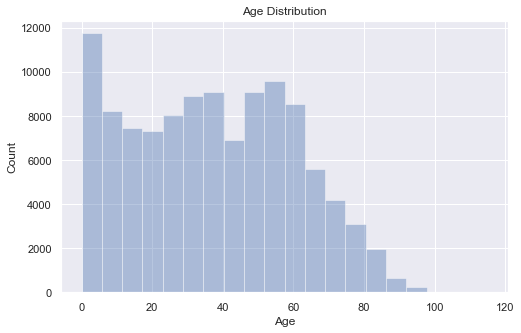

In [31]:
plt.figure(figsize=(8,5))
ax = sns.distplot(x=df['age'], bins=20,  kde=False)

ax.set(xlabel='Age', ylabel='Count')
ax.set_title('Age Distribution');

* As we can see ages from 0 to 5 has the most appointments booked
* Number of appointments decline from age 60 and older

### 3. Does waiting time between scheduled and appointment day have an effect on missing the appointment?

In [32]:
# add a new column for the wait time
df['wait_time'] = df['appointment_day'] - df['scheduled_day']

# drop any negative wait times
df.drop(df[df.wait_time.dt.days < 0].index, inplace=True)

# Change the wait_time variable from timedelta to int
df['wait_time'] = df['wait_time'].dt.days

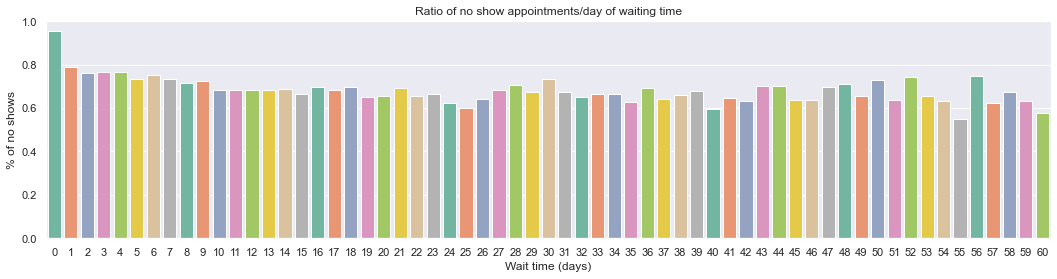

In [33]:
# Calculating the rate of no shows over total appointments/day of wait time
waiting_ratio = df.groupby('wait_time')['no_show'].mean()
plt.figure(figsize=(18,4))

#I cut off wait times > 60 days for visibility reasons. so wait times is less than 60 days.
sns.set(style='darkgrid')
ax = sns.barplot(x=waiting_ratio.index, y=waiting_ratio, order=df.wait_time.iloc[:61].index, palette='Set2')
ax.set_title('Ratio of no show appointments/day of waiting time')
ax.set(xlabel='Wait time (days)', ylabel='% of no shows');

- It doesn't seem to be a simple linear relation between waiting time and showing/missing the appointment

### 4. Does receiving an SMS has an affect on missing the appointment?

In [34]:
# First i'm gonna create two datasets with patients one with patients who did show up and one with no show up

did_show     = df[df['no_show']==1]
did_not_show =  df[df['no_show']==0]

In [35]:
# Patients that didn't received an SMS but did not show up
show_received = did_show['sms_received'].value_counts()[1]


# Patients that received an SMS but did not show up
noshow_received = did_not_show['sms_received'].value_counts()[1]

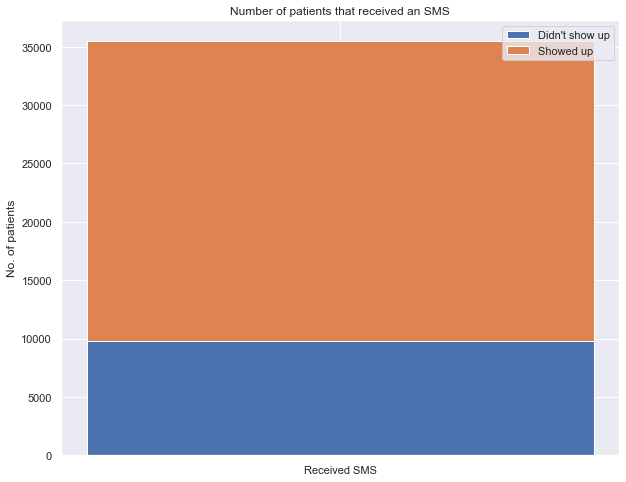

In [36]:
labels = ['Received SMS']
showed = show_received
notshowed = noshow_received

sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax.bar(labels, notshowed, label='Didn\'t show up')
ax.bar(labels, showed, bottom=notshowed, label='Showed up')

ax.set_ylabel('No. of patients')
ax.set_title('Number of patients that received an SMS')
ax.legend()

plt.show()

- We can say that if the patient receives an SMS, they are more likely to show up to the appointment.

<a id='conclusions'></a>
## Conclusions

- Summarizing the analysis and what I've learned from our research questions, we find that there's little evidence to support a relation between **Alcholoism** and the chance of showing up/missing an appointment. 


- Ages 0 to 5 has the most number of appointments booked. And apparently number of appointments decline from ages 60 and older


- Patients who received an SMS are more likely to show up to the appointment


- and we couldn't find any relation between waiting time and showing/missing the appointment

<a id='limitations'></a>
## limitations

1. It would be great if there were a data about where the patient lived to see how far the hospital is from the patient, and to find out if there is maybe a correlation between the distance of the house and the hospital's location and maybe do some ML on that subject


2. The dataset in this analysis was over 40 day period. Data for a longer time would provide insights into how seasonality and holidays impact no-show rates.

In [37]:
df['appointment_day'].max() - df['appointment_day'].min()

Timedelta('40 days 00:00:00')